In [1]:
## Import Modules
import numpy as np
from scipy.sparse import spdiags
import matplotlib.pyplot as plt

In [2]:
def PlotSavefig(x, P, t, L):
  # Function to Plot & Save Pressure
  # fig = plt.figure()
    plt.plot(x, P_new, label='t={0:05.2f}'.format(t)) 
    plt.xlabel('x[m]')
    plt.ylabel('Pressure [Pa]')
    plt.xlim(0, L)
    plt.ylim(-1,1)
    plt.grid()
    plt.title('Pressure Diffusion 1D@{0:05.2f}[s]'.format(t))
  # fig.savefig('t={0:05.2f}.png'.format(t)) #画像保存には20行目と21行目も実行
  # plt.clf()

In [9]:
## Input Parmeters
L   = 2*np.pi    # Length of Reservoir[m]
N   = 100    # Number of Control Volume[-]
k   = 0.2     # Permiability[m^2]
A   = 1     # cross-sectional area of reservoir[m^2]
phi = 1     # Porosity[-]
c   = 1     # Compressibility[Pa^-1]
mu  = 1     # Viscosity of Fluid[Pa*s]
Q   = np.zeros(N) # Source vector[m^2]
Tm  = np.zeros([N,N]) # transmissibility Matrix
B   = np.zeros([N,N]) # Volume accumulation Matrix
dx  = L/N # Size of Control Volume[m]
x   = np.zeros(N) # x coordinate[m]
x[0]= dx/2
for i in range(1, N):
  x[i] = x[i-1] + dx

## Parameters for Simulation
tmax = 20 # Time to stop simlation [s]
dt   = 0.005   # dt [s]
nout = 250  # output result ever nout step[s]
# Variable to decide Boundary condition
#  1> Neumann, 0> Dirichlet
BC_right = 0 # Boundary at right(x = L) 
BC_left  = 0 # Boundary at Left (x = 0)
Pb_right = 0 # Pressure Value at x = L
Pb_left  = 0 # Pressure Value at x = 0

## Initial Conditions
# P_init = np.ones(N)      # Initial Pressure
P_init = np.sin(x)

In [10]:
## define Q, Tm, B

# Tm
T = k*A/(mu*dx)
for i in range(0, N-1):
    Tm[i,i]   = 2*T
    Tm[i,i+1] = -T
    Tm[i+1,i] = -T
Tm[N-1, N-1] = 2*T

# B
for i in range(0, N):
    B[i,i] = A*dx*phi*c/dt

# Boundary Condition and Q
if BC_left == 0:
    Q[0] = 2*T*Pb_left
    Tm[0,0] = 3*T
if BC_right == 0:
    Q[N-1] = 2*T*Pb_right
    Tm[N-1,N-1] = 3*T
    

250th Time step 01.25
500th Time step 02.50
750th Time step 03.75
1000th Time step 05.00
1250th Time step 06.25
1500th Time step 07.50
1750th Time step 08.75
2000th Time step 10.00
2250th Time step 11.25
2500th Time step 12.50
2750th Time step 13.75
3000th Time step 15.00
3250th Time step 16.25
3500th Time step 17.50
3750th Time step 18.75


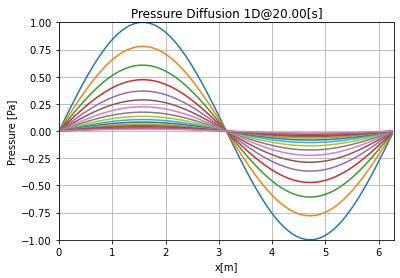

In [11]:
## Simulation
P_old  = np.copy(P_init) # Pressure at n-th step
P_new  = np.copy(P_init) # Pressure at n+1-th step
t = 0
n = 0
fig = plt.figure()
# Plot Initial Condition
PlotSavefig(x, P_new, t, L)
while True:
    # solve Simultaneous equations
    P_new = np.linalg.solve((Tm + B), (np.dot(B,P_old)+Q)) 
    
    # Update Values, time step and Add plot
    P_old = np.copy(P_new)
    t = t + dt
    n = n + 1
    
    if t >= tmax:
        break
    
    if n%nout == 0:
        print('{0}th Time step {1:05.2f}'.format(n, t))
        PlotSavefig(x, P_new, t, L)

            
PlotSavefig(x, P_new, t, L)
plt.show()

In [12]:
 Tm

array([[ 9.54929659, -3.18309886,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-3.18309886,  6.36619772, -3.18309886, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -3.18309886,  6.36619772, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  6.36619772,
        -3.18309886,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -3.18309886,
         6.36619772, -3.18309886],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -3.18309886,  9.54929659]])